# Analysis of similarity matrix

In [3]:
import pandas as pd

path = '../results/20240417-gradcam-256-only-same-prediction/20240417_1037_similarity_matrix_gradcam_cosine_only_matching.csv'

df = pd.read_csv(path, index_col=0)
df

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,1.000001,0.737058,0.720390,0.691266,0.719070,0.632324,0.661160,0.733840,0.724163,0.726422,0.719023,0.648564,0.688757,0.588571
DeiT_T,0.737058,1.000001,0.691958,0.655379,0.701709,0.624852,0.628832,0.726139,0.704535,0.712273,0.696963,0.634443,0.654603,0.571079
DenseNet121,0.720390,0.691958,1.000000,0.876981,0.899659,0.699135,0.873185,0.881778,0.863778,0.902263,0.907225,0.840821,0.945386,0.650332
EfficientNet_B3,0.691266,0.655379,0.876981,1.000001,0.879911,0.672407,0.786662,0.846159,0.843700,0.881849,0.895521,0.861088,0.889879,0.646362
EfficientNet_B4,0.719070,0.701709,0.899659,0.879911,1.000000,0.681195,0.836448,0.871659,0.872378,0.888162,0.899507,0.811894,0.881893,0.658231
ConvNeXtV2_Nano,0.632324,0.624852,0.699135,0.672407,0.681195,1.000001,0.616058,0.762745,0.698319,0.745145,0.715461,0.662830,0.656244,0.559525
PyramidViT_V2_B2,0.661160,0.628832,0.873185,0.786662,0.836448,0.616058,1.000000,0.785043,0.808210,0.788972,0.793718,0.715830,0.856927,0.606585
MobileNetV3,0.733840,0.726139,0.881778,0.846159,0.871659,0.762745,0.785043,1.000000,0.846697,0.893456,0.874585,0.792676,0.845181,0.672509
Swin_T,0.724163,0.704535,0.863778,0.843700,0.872378,0.698319,0.808210,0.846697,1.000001,0.878846,0.895186,0.810329,0.829569,0.655215
ResNet18,0.726422,0.712273,0.902263,0.881849,0.888162,0.745145,0.788972,0.893456,0.878846,1.000001,0.927499,0.853655,0.872823,0.658327


## Heatmap

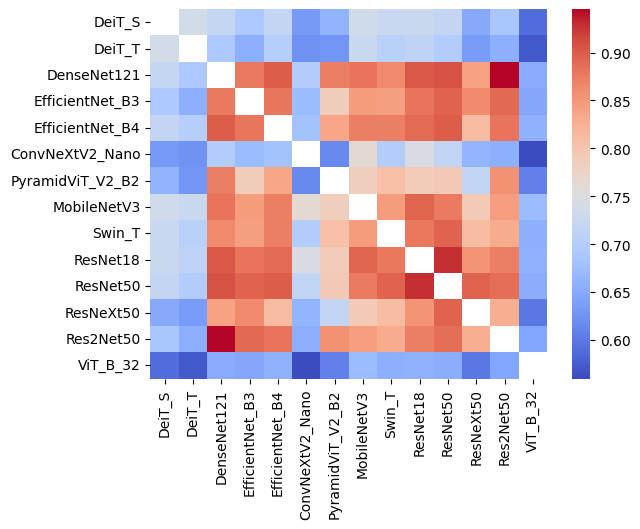

In [5]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [13]:
# PCA of distances
df_distances = 1 - df

In [14]:
from src.utils import models_to_architecture_mapping
models_to_architecture_mapping

{'DeiT_S': 'transformer',
 'DeiT_T': 'transformer',
 'DenseNet121': 'CNN',
 'EfficientNet_B3': 'CNN',
 'EfficientNet_B4': 'CNN',
 'ConvNeXtV2_Nano': 'CNN',
 'PyramidViT_V2_B2': 'transformer',
 'MobileNetV3': 'CNN',
 'Swin_T': 'transformer',
 'ResNet18': 'CNN',
 'ResNet50': 'CNN',
 'ResNeXt50': 'CNN',
 'Res2Net50': 'CNN',
 'ViT_B_32': 'transformer'}

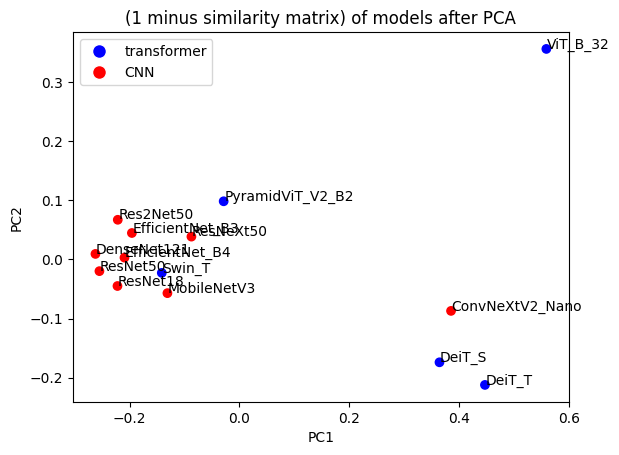

In [24]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
])
plt.show()